# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
!pip3 install citipy

     |████████████████████████████████| 557 kB 3.1 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=373da9914e2058b01b84a4d1e43ce30ad4c7d3ec5eca036f2d4ebe652b3e424e
  Stored in directory: /Users/chelseaball/Library/Caches/pip/wheels/6d/df/5e/ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy


In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [78]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities) #617

597

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [117]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
base_url = f"{url}APPID={weather_api_key}&q="


city_data = []

print("Beginning Data Retrieval")
print("--------------------------")
# use iterrows to iterate through pandas dataframe
for index, city in enumerate(cities):
    
    print(f"Processing record {index}: {city}")
    
    try:
        # assemble url and make API request
        response = requests.get(base_url + city).json()
        
#         if index == 1:
#             print(base_url + city)
        
        city_lat = response['coord']["lat"]
        city_lon = response['coord']["lon"]
        max_temp = response['main']['temp_max']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        wind_speed = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        
        #Store data for each city found
        city_data.append({"City": city, 
                         "Lat": city_lat,
                         "Lon": city_lon,
                         "Max Temp": max_temp,
                         "Humidity": humidity,
                         "Cloudiness": cloudiness,
                         "Wind Speed": wind_speed,
                         "Country": country,
                         "Date": date})
        
    except (KeyError, IndexError):
        print("City Not found.Skipping...")
        
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")


Beginning Data Retrieval
--------------------------
Processing record 0: souillac
Processing record 1: shubarkuduk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9ffa18eb275e20275c32d718a9a31ad7&q=shubarkuduk
Processing record 2: bukavu
Processing record 3: tuktoyaktuk
Processing record 4: westport
Processing record 5: hermanus
Processing record 6: east london
Processing record 7: sibolga
Processing record 8: kaitangata
Processing record 9: sitka
Processing record 10: punta arenas
Processing record 11: malwan
City Not found.Skipping...
Processing record 12: beringovskiy
Processing record 13: rikitea
Processing record 14: busselton
Processing record 15: srednekolymsk
Processing record 16: ushuaia
Processing record 17: leningradskiy
Processing record 18: bethel
Processing record 19: puerto madero
Processing record 20: port alfred
Processing record 21: lebu
Processing record 22: tsihombe
City Not found.Skipping...
Processing record 23: fortuna
Processing record 24: ni

Processing record 231: hualmay
Processing record 232: alofi
Processing record 233: victoria
Processing record 234: yumen
Processing record 235: lugazi
Processing record 236: baruun-urt
Processing record 237: half moon bay
Processing record 238: vila franca do campo
Processing record 239: moron
Processing record 240: ahipara
Processing record 241: lata
Processing record 242: lawton
Processing record 243: maldonado
Processing record 244: illoqqortoormiut
City Not found.Skipping...
Processing record 245: merauke
Processing record 246: trairi
Processing record 247: djenne
Processing record 248: fort nelson
Processing record 249: salym
Processing record 250: durango
Processing record 251: samsun
Processing record 252: lima
Processing record 253: kuryk
Processing record 254: saint-augustin
Processing record 255: bathsheba
Processing record 256: nizhneyansk
City Not found.Skipping...
Processing record 257: rio grande
Processing record 258: port hedland
Processing record 259: chara
Processing 

Processing record 473: whitehorse
Processing record 474: maumere
Processing record 475: conop
Processing record 476: poronaysk
Processing record 477: nemuro
Processing record 478: ostrovnoy
Processing record 479: cayenne
Processing record 480: kensington
Processing record 481: ambodifototra
City Not found.Skipping...
Processing record 482: sungaipenuh
Processing record 483: kavieng
Processing record 484: taoudenni
Processing record 485: sembe
Processing record 486: halalo
City Not found.Skipping...
Processing record 487: multan
Processing record 488: lahaina
Processing record 489: bronnoysund
Processing record 490: sosnovo-ozerskoye
Processing record 491: telica
Processing record 492: shugurovo
Processing record 493: berlevag
Processing record 494: hirara
Processing record 495: ngukurr
City Not found.Skipping...
Processing record 496: tateyama
Processing record 497: yuzhno-kurilsk
Processing record 498: huanuni
Processing record 499: verkhovazhye
Processing record 500: compiegne
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [118]:
# Make city data into DF and export the cities DataFrame to a CSV file
city_df = pd.DataFrame(city_data)
city_df.describe()

city_df.to_csv(output_data_file, index_label="City ID")
city_df.head()


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,souillac,-20.5167,57.5167,78.80,83,40,8.05,MU,1612054156
1,shubarkuduk,49.1447,56.4872,15.42,94,0,9.37,KZ,1612054156
2,bukavu,-2.5083,28.8608,60.24,83,34,0.89,CD,1612054157
3,tuktoyaktuk,69.4541,-133.0374,-34.60,67,40,3.44,CA,1612054090
4,westport,41.1415,-73.3579,28.00,39,1,4.61,US,1612054157


In [119]:
city_df.count()
city_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,20.126422,20.695510,48.227794,73.795956,54.047794,8.284908,1.612054e+09
std,33.304832,92.389879,33.870483,18.394708,41.572071,5.841997,8.153155e+01
min,-54.800000,-179.166700,-48.030000,20.000000,0.000000,0.180000,1.612054e+09
25%,-7.961175,-58.866825,28.000000,64.000000,2.000000,3.552500,1.612054e+09
50%,23.492150,21.715750,60.920000,78.000000,71.000000,7.000000,1.612054e+09
75%,49.204175,105.273700,75.200000,87.000000,99.000000,11.500000,1.612054e+09
max,78.218600,179.316700,95.000000,100.000000,100.000000,33.380000,1.612054e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [120]:
city_df.loc[city_df["Humidity"] > 100] # No rows returned


,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

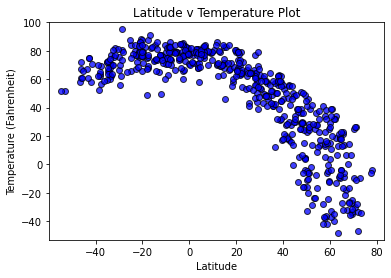

In [174]:
#Make plot
temp = city_df["Max Temp"]
lat = city_df["Lat"]

plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min temp
plt.ylim(min(temp) - 5, max(temp) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Latitude v Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")

plt.savefig("Latitude_Temperature.png")

# Prints the scatter plot to the screen
plt.show()

#The plot shows that the further away a location is from the equater, the lower the max temperate
#The more extreme cold temperates (< 0 degrees F) are all in the Northern hemisphere. 

## Latitude vs. Humidity Plot

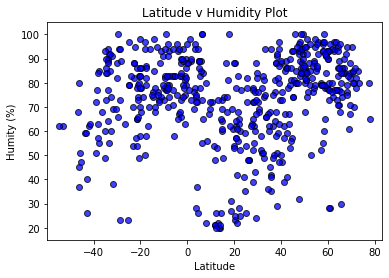

In [175]:
#Make plot
humid = city_df["Humidity"]
lat = city_df["Lat"]

plt.scatter(lat, humid, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min humudity
plt.ylim(min(humid) - 5, max(humid) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Latitude v Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humity (%)")

plt.savefig("Latitude_Humidity.png")

# Prints the scatter plot to the screen
plt.show()

#There isn't too much of a trend for this scatter plot
#The cities with a higher percent of humidity are near the equater and around a latitude of 50 

## Latitude vs. Cloudiness Plot

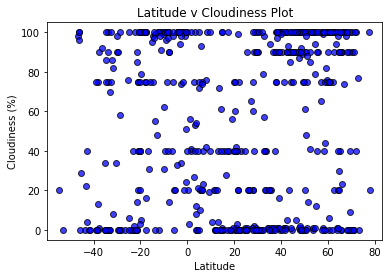

In [176]:
#Make plot
cloud = city_df["Cloudiness"]
lat = city_df["Lat"]

plt.scatter(lat, cloud, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min cloudiness
plt.ylim(min(cloud) - 5, max(cloud) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Latitude v Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Latitude_Cloudiness.png")

# Prints the scatter plot to the screen
plt.show()

#Once again not too much of a general trend 
#But there does seem to be either high cloudines or no cloudiness for most the data (some in between)

## Latitude vs. Wind Speed Plot

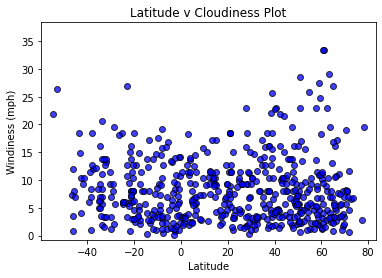

In [177]:
#Make plot
wind = city_df["Wind Speed"]
lat = city_df["Lat"]

plt.scatter(lat, wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min cloudiness
plt.ylim(-0.75, max(wind) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Latitude v Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Windiness (mph)")

plt.savefig("Latitude_WindSpeed.png")

# Prints the scatter plot to the screen
plt.show()

#Most of the data has wind speeds between 0 and 15 mph
#Latitude does not seem to have an effect on wind speed

## Linear Regression

In [135]:
#Separate our data frame into different hemispheres
city_df.head()
nor_hem_df = city_df.loc[city_df["Lat"] >= 0]

so_hem_df = city_df.loc[city_df["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

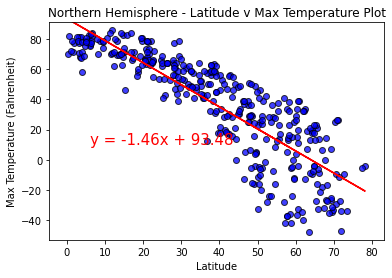

In [178]:
#Make plot
temp = nor_hem_df["Max Temp"]
lat = nor_hem_df["Lat"]

plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min temp
plt.ylim(min(temp) - 5, max(temp) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Latitude v Max Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")

# Add linear regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("NH_Latitude_Tem.png")

# Prints the scatter plot to the screen
plt.show()

#This plot is showing the relationship between latitude of cities in the Northern Hemisphere and their max temperature
#The further a city is from the equater(x > 0), the lower the max temp

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

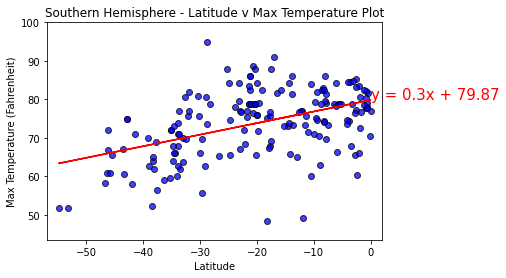

In [179]:
#Make plot
temp = so_hem_df["Max Temp"]
lat = so_hem_df["Lat"]

plt.scatter(lat, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min temp
plt.ylim(min(temp) - 5, max(temp) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 2, max(lat) + 2)

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Latitude v Max Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Fahrenheit)")

# Add linear regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0, 80),fontsize=15,color="red")

plt.savefig("SH_Latitude_Temp.png")

# Prints the scatter plot to the screen
plt.show()

#This plot is showing the relationship between latitude of cities in the Southern Hemisphere and their max temperature
#The further a city is from the equater(x < 0), the lower the max temp

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

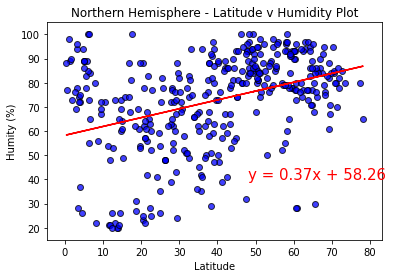

In [180]:
#Make plot
humid = nor_hem_df["Humidity"]
lat = nor_hem_df["Lat"]

plt.scatter(lat, humid, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min humudity
plt.ylim(min(humid) - 5, max(humid) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Latitude v Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humity (%)")

# Add linear regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humid)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(48, 40),fontsize=15,color="red")

plt.savefig("NH_Latitude_Humidity.png")

# Prints the scatter plot to the screen
plt.show()

#This plot is showing the relationship between latitude of cities in the Northern Hemisphere and their humidity percentage
#The further a city is from the equater(x > 0), the higher percent humidity

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

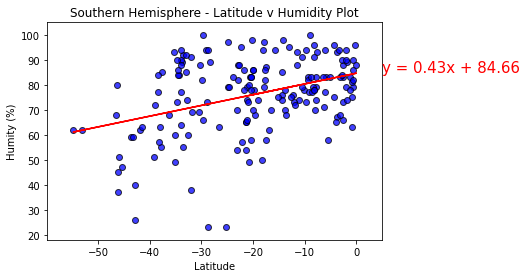

In [181]:
#Make plot
humid = so_hem_df["Humidity"]
lat = so_hem_df["Lat"]

plt.scatter(lat, humid, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min humudity
plt.ylim(min(humid) - 5, max(humid) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Latitude v Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humity (%)")

# Add linear regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, humid)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(5,85),fontsize=15,color="red")

plt.savefig("SH_Latitude_Humidity.png")

# Prints the scatter plot to the screen
plt.show()

#This plot is showing the relationship between latitude of cities in the Southern Hemisphere and their humidty percentage
#The further a city is from the equater(x < 0), the lower the percent of humdity


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

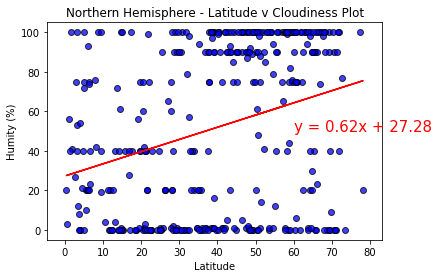

In [182]:
#Make plot
cloud = nor_hem_df["Cloudiness"]
lat = nor_hem_df["Lat"]

plt.scatter(lat, cloud, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min humudity
plt.ylim(min(cloud) - 5, max(cloud) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Latitude v Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Humity (%)")

# Add linear regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(60,50),fontsize=15,color="red")

plt.savefig("NH_Latitude_Cloudiness.png")

# Prints the scatter plot to the screen
plt.show()

#This plot is showing the relationship between latitude of cities in the Northern Hemisphere and their cloudiness percentage
#In general, the further a city is from the equater(x > 0), the higher the cloudiness percentage

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

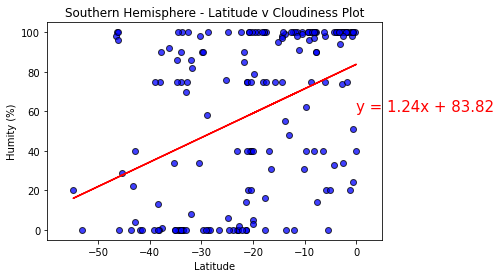

In [183]:
#Make plot
cloud = so_hem_df["Cloudiness"]
lat = so_hem_df["Lat"]

plt.scatter(lat, cloud, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min humudity
plt.ylim(min(cloud) - 5, max(cloud) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Latitude v Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Humity (%)")

# Add linear regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")

plt.savefig("SH_Latitude_Cloudiness.png")

# Prints the scatter plot to the screen
plt.show()
#This plot is showing the relationship between latitude of cities in the Southern Hemisphere and their cloudiness percentage
#In general, the further a city is from the equater(x < 0), the lower the cloudiness percentage

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

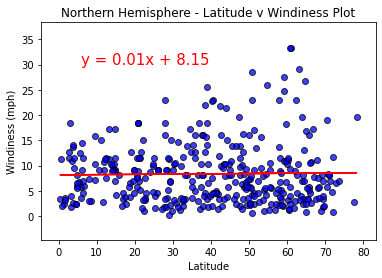

In [184]:
#Make plot
wind = nor_hem_df["Wind Speed"]
lat = nor_hem_df["Lat"]

plt.scatter(lat, wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min humudity
plt.ylim(min(wind) - 5, max(wind) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Northern Hemisphere - Latitude v Windiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Windiness (mph)")

# Add linear regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")

plt.savefig("NH_Latitude_Windiness.png")

# Prints the scatter plot to the screen
plt.show()

#This plot is showing the relationship between latitude of cities in the Northern Hemisphere and their wind speed
#The slope in this case is very small. There is not a significant change in wind spped the further a city is from the equater

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

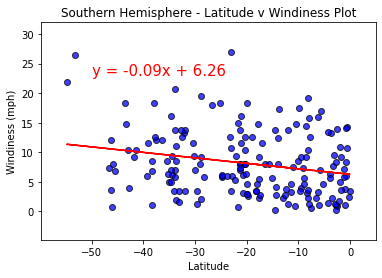

In [185]:
#Make plot
wind = so_hem_df["Wind Speed"]
lat = so_hem_df["Lat"]

plt.scatter(lat, wind, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Set y lim based on max and min humudity
plt.ylim(min(wind) - 5, max(wind) + 5)

# Set the x lim based on max and min lat
plt.xlim(min(lat) - 5, max(lat) + 5)

# Create a title, x label, and y label for our chart
plt.title("Southern Hemisphere - Latitude v Windiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Windiness (mph)")

# Add linear regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")

plt.savefig("SH_Latitude_Windiness.png")

# Prints the scatter plot to the screen
plt.show()

#This plot is showing the relationship between latitude of cities in the Southern Hemisphere and their wind speed
#The slope in this case is also small but there is a slight change in wind speed the further a city is from the equater